# Bike Sharing System Data

## by Evelin Battocchio

## Contents

* Dataset overview

* Univariate Exploration

* Bivariate Exploration

* Multivariate Exploration

* Conclusions

## Investigation Overview

In this presentation, I'll investigate a dataset about individual rides made in the bike-sharing system provided by Bay Wheels in 2019, which covers the greater San Francisco Bay area. 

## Dataset Overview

The dataset contains 16 columns and 2407259 entries, representing information about:


* Bike ride duration, start and end time
* Start station ID, name, latitude and longitude
* End station ID, name, latitude and longitude
* Bike ID
* User type: either Subscriber or Customer


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# Join data from all months of 2019
df = pd.concat([pd.read_csv(file) for file in glob.glob("Data/*.csv")], ignore_index=True)

# Drop unnecessary columns
df.drop(["bike_share_for_all_trip", "rental_access_method"], axis=1, inplace=True)
df.head()

# Drop rows with null values
df.dropna(inplace=True)

# Convert start_time and end_time to datetime
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

# Convert start_station_id and end_station_id to int64
df["start_station_id"] = df["start_station_id"].astype("int64")
df["end_station_id"] = df["end_station_id"].astype("int64")

# Create column for starting month
df["start_month"] = pd.DatetimeIndex(df['start_time']).month

# Create column for starting day
df["start_day"] = pd.DatetimeIndex(df['start_time']).weekday

# Add column with duration in minutes
df["duration_min"] = df["duration_sec"]/60

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2506660
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_id         2407259 non-null  int64         
 4   start_station_name       2407259 non-null  object        
 5   start_station_latitude   2407259 non-null  float64       
 6   start_station_longitude  2407259 non-null  float64       
 7   end_station_id           2407259 non-null  int64         
 8   end_station_name         2407259 non-null  object        
 9   end_station_latitude     2407259 non-null  float64       
 10  end_station_longitude    2407259 non-null  float64       
 11  bike_id                  2407259 non-null  int64         
 12  

## Visualization 1: Ride count per user type

We'll first evaluate the distribution of bike rides according to the type of user: subscriber or customer

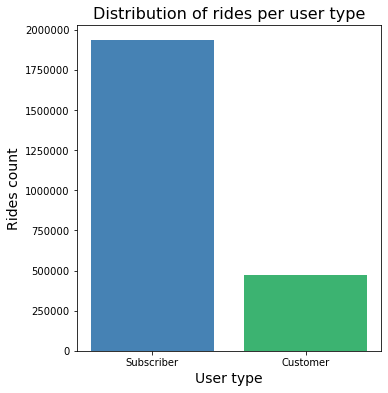

In [7]:
# Plot distribution of rides according to user type
user_counts = df["user_type"].value_counts()
plt.figure(figsize=(12, 6))

# Bar chart
plt.subplot(1, 2, 1)
plt.bar(user_counts.index, user_counts.values, color=["steelblue", "mediumseagreen"]) 
plt.title('Distribution of rides per user type', fontsize=16)
plt.xlabel('User type', fontsize=14)
plt.ylabel('Rides count', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')

## Visualization 2: Number of rides per day of week

Next, we'll plot the distribution of rides in each day of the week, taking into account the information on the ride starting time.

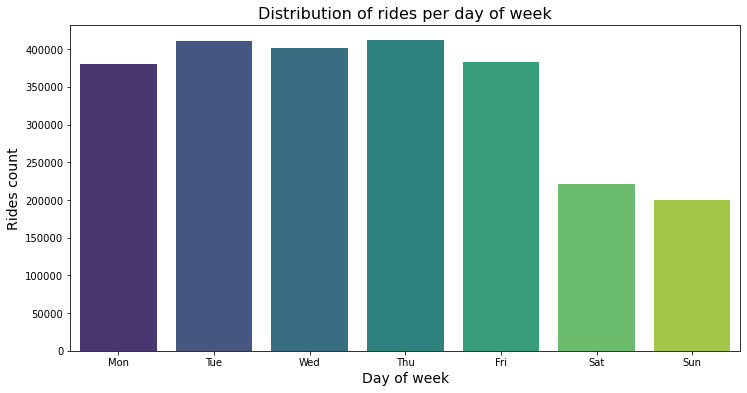

In [8]:
# Plot distribution of rides per day as countplot
plt.figure(figsize=(12, 6))
sb.countplot(data=df,x='start_day', palette="viridis");
plt.title('Distribution of rides per day of week', fontsize=16);
plt.xlabel('Day of week', fontsize=14);
plt.ylabel('Rides count', fontsize=14);
plt.xticks([0,1,2,3,4,5,6],["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

## Visualization 3: Mean trip duration per day of week and user type

Now we'll observe the relationship between bike ride duration, day of the week and user type.

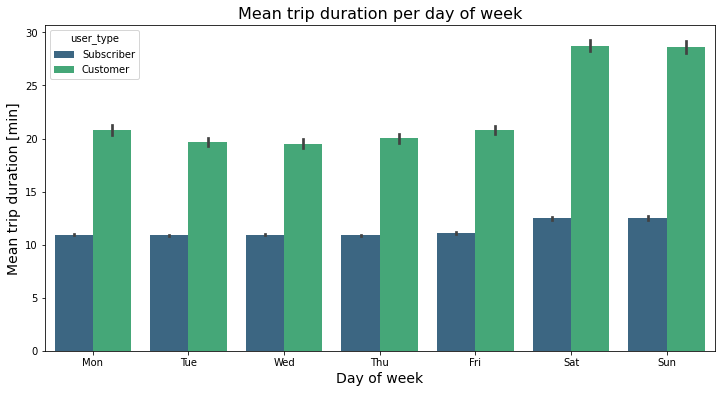

In [9]:
# Plot trip duration per day of week and user type as barplot
plt.figure(figsize =(12, 6)) 
sb.barplot(data=df, x="start_day", y="duration_min", hue="user_type", palette="viridis")
plt.title('Mean trip duration per day of week', fontsize=16)
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Mean trip duration [min]', fontsize=14)
plt.xticks([0,1,2,3,4,5,6],["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

## Conclusions

* Approximately 80% of the people who use the bicycles are subscribers, while the remaining 20% are occasional users.

* The use of the bike sharing system remains almost constant during the week, but drops significantly on the weekends.

* On average, the duration of bike rides is longer for occasional customers than for subscribed users.

* Trip lengths are longer on the weekends, and this is mainly attributed to occasional users. 